# Title of Blogpost

This notebook accompanies the Jina AI blogpost [Title of Blogpost](https://jina.ai/news/title-of-blogpost). It should run in notebooks serving Python 3.11 or later, or on Google Colab.

## Reranking Models

This section of the notebook contains basic code for accessing the Jina-ColBERT English reranker model (`jina-colbert-v1-en`).

You will be prompted for an API key. You can get one from the [Jina Reranker web page](https://jina.ai/reranker/#apiform).

In [1]:
import getpass

print("Paste your Jina Reranker API key here: ")
jina_api_key = getpass.getpass()

Paste your Jina Reranker API key here: 


 ········


### Required Libraries

Now, install the `requests` package if it's not already installed.

In [2]:
!pip install requests


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


### Making Requests to the Jina Reranker API

The code below is basic boilerplate Python code for accessing the Jina Reranker API and processing texts.

In [3]:
import requests

url = "https://api.jina.ai/v1/rerank"

headers = {
    "Content-Type": "application/json",
    "Authorization": f"Bearer {jina_api_key}"
}
data = {
    "model": "jina-colbert-v1-en",
    "query": "Elephants eat 150 kg of food per day.",
    "documents": [
        "Elephants eat 150 kg of food per day.",
        "Every day, the average elephant consumes roughly 150 kg of food.",
        "The rain in Spain falls mainly on the plain.",
    ],
    "top_n": 3
}

response = requests.post(url, headers=headers, json=data)
for item in response.json()['results']:
    print(f"{item['relevance_score']} : {item['document']['text']}")

11.15625 : Elephants eat 150 kg of food per day.
9.6328125 : Every day, the average elephant consumes roughly 150 kg of food.
1.568359375 : The rain in Spain falls mainly on the plain.


## Explaining Rankings with Heat Maps

This section will use the Jina Reranker to create heat maps of token-level interactions between query and target documents, so you can visualize how it scores document pairs.

### Required Libraries

Run the following to install the necessary prerequisites:

In [4]:
!pip install matplotlib seaborn torch Pillow

  Using cached matplotlib-3.9.0-cp311-cp311-win_amd64.whl (8.0 MB)
  Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
  Using cached torch-2.3.1-cp311-cp311-win_amd64.whl (159.8 MB)
  Using cached pillow-10.3.0-cp311-cp311-win_amd64.whl (2.5 MB)



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Also install ColBERT v2 functionality from (Stanford's GitHub repository)[https://github.com/stanford-futuredata/ColBERT].

In [5]:
!pip install git+https://github.com/stanford-futuredata/ColBERT


  Cloning https://github.com/stanford-futuredata/ColBERT to c:\users\marte\appdata\local\temp\pip-req-build-mtd80p01
  Resolved https://github.com/stanford-futuredata/ColBERT to commit b7352c245f555626ab9625ba38a01ac74586468b
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/stanford-futuredata/ColBERT 'C:\Users\marte\AppData\Local\Temp\pip-req-build-mtd80p01'

[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


### Download utilities

This file contains code for accessing the token-level of the Jina Reranker API and using `matplotlib` to generate heat maps.

In [6]:
!python -m wget https://raw.githubusercontent.com/jina-ai/workshops/docs-heatmaps/notebooks/heatmaps/jina_colbert_heatmaps.py

D:\IdeaProjects\workshops\venv\Scripts\python.exe: No module named wget


### Create a Function to Make Heat Maps

With all this in place, we just need one function that takes two texts as arguments and returns a figure:

In [6]:
from jina_colbert_heatmaps import JinaColbertHeatmapMaker

def create_heatmap(query, document):
    heat_map_maker = JinaColbertHeatmapMaker(jina_api_key=jina_api_key)
    # get token embeddings for the query
    query_emb = heat_map_maker.embed(query, is_query=True)
    # get token embeddings for the target document
    document_emb = heat_map_maker.embed(document, is_query=False)
    return heat_map_maker.compute_heatmap(document_emb[0], query_emb[0])


D:\IdeaProjects\workshops\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Making Heat Maps

Let's make a heat map showing the interaction between the two sentences below:
* "Elephants eat 150 kg of food per day."
* "Every day, the average elephant consumes roughly 150 kg of food."

It may take a minute to run.

In [7]:
img = create_heatmap("Elephants eat 150 kg of food per day.", "Every day, the average elephant consumes roughly 150 kg of food.")

D:\IdeaProjects\workshops\venv\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


[Jun 18, 10:55:21] Loading segmented_maxsim_cpp extension (set COLBERT_LOAD_TORCH_EXTENSION_VERBOSE=True for more info)...


D:\IdeaProjects\workshops\venv\Lib\site-packages\torch\utils\cpp_extension.py:384: UserWarning: Error checking compiler version for cl: [WinError 2] The system cannot find the file specified
  warnings.warn(f'Error checking compiler version for {compiler}: {error}')


CalledProcessError: Command '['where', 'cl']' returned non-zero exit status 1.

/Users/jinaaidevrel/IdeaProjects/colbert-visualizer/venv/lib/python3.11/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/Users/jinaaidevrel/IdeaProjects/colbert-visualizer/venv/lib/python3.11/site-packages/torch/amp/grad_scaler.py:131: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn(


<Figure size 640x480 with 0 Axes>

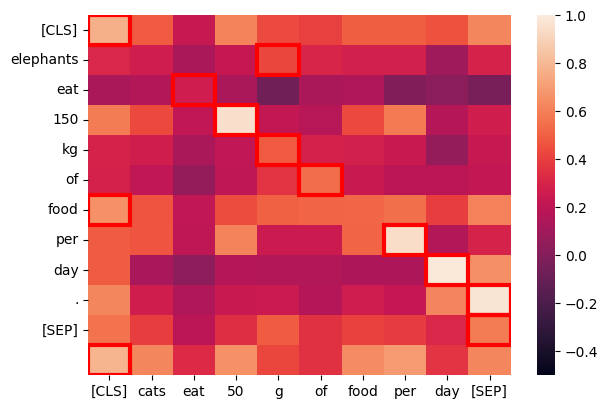

In [6]:
img = create_heatmap("Elephants eat 150 kg of food per day.", "Cats eat 50 g of food per day.")

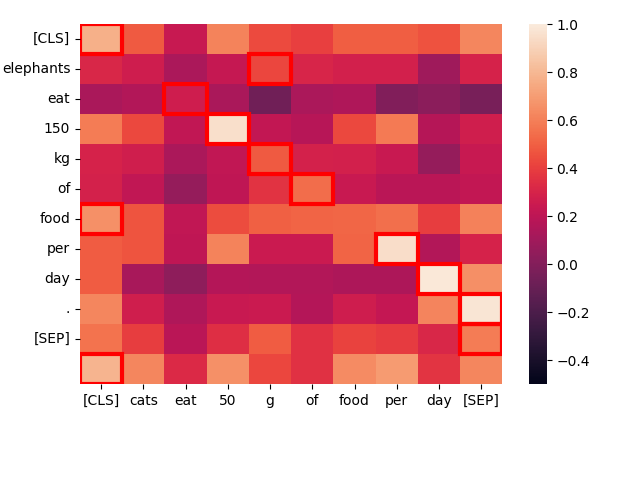

In [6]:
img